In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import seaborn as sb

In [93]:
data=pd.read_csv('gold_price_data.csv',index_col=0)
data

,Value
Date,
1970-01-01,35.20
1970-04-01,35.10
1970-07-01,35.40
1970-10-01,36.20
1971-01-01,37.40
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10787 entries, 1970-01-01 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   10787 non-null  float64
dtypes: float64(1)
memory usage: 168.5+ KB


In [95]:
data.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [96]:
data=data.sort_values(by=["Date"],ignore_index=True)
data

,Value
0,35.20
1,35.10
2,35.40
3,36.20
4,37.40
...,...
10782,1672.50
10783,1655.70
10784,1653.75
10785,1570.70


In [97]:
data1=data.sample(n=10)
data1

,Value
1135,416.50
5819,266.70
1702,323.30
1842,321.50
4184,384.70
5645,289.75
3837,391.75
8853,1746.50
1847,317.40
71,247.05


In [98]:
# plt.figure(figsize=(20,10))
# # plt.grid()
# plt.xlabel("Date")
# plt.ylabel("Value")
# plt.plot(data["Value"])
# plt.title("Gold Price")
# plt.xticks(rotation = 90)
# plt.show()

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

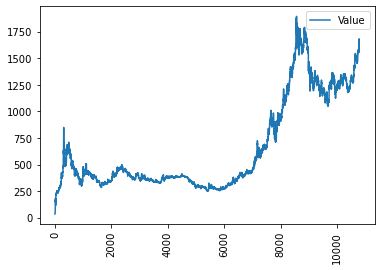

In [99]:
data.plot()
plt.xticks(rotation = 90)

In [100]:
len(data)*0.80

8629.6

In [101]:
Train = data[:8630]
Test = data[8631:]
Train

,Value
0,35.2
1,35.1
2,35.4
3,36.2
4,37.4
...,...
8625,1752.0
8626,1747.0
8627,1744.0
8628,1708.0


In [102]:
Test

,Value
8631,1709.00
8632,1659.50
8633,1672.50
8634,1603.00
8635,1574.00
...,...
10782,1672.50
10783,1655.70
10784,1653.75
10785,1570.70


In [103]:
#checking stationary

In [104]:
#augmented dickey fuller test #adfuller
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [11]:
# result=seasonal_decompose(data["Value"],model="multiplicative",freq=30)
# fig=plt.figure()
# fig=result.plot()
# fig.set_size_inches(16,9)

In [25]:
from statsmodels.tsa.stattools import adfuller

In [30]:
dftest=adfuller(Train)

In [31]:
print(dftest)

(3.414193932596559, 1.0, 37, 8592, {'1%': -3.4311113192218157, '5%': -2.86187645173724, '10%': -2.566949088330078}, 59460.01255798764)


In [32]:
dfout=pd.DataFrame(dftest[0:4],index=["Test Statistics","p-value","Lag","Number of observations used"])

In [33]:
dfout

,0
Test Statistics,3.414194
p-value,1.000000
Lag,37.000000
Number of observations used,8592.000000


In [105]:
Train_s1=Train- Train.shift(1)

In [106]:
Train_s1

,Value
0,NaN
1,-0.1
2,0.3
3,0.8
4,1.2
...,...
8625,6.0
8626,-5.0
8627,-3.0
8628,-36.0


In [20]:
# plt.figure(figsize=(12,6))
# plt.grid(True)
# plt.xlabel("Date")
# plt.ylabel("S1")
# plt.plot(data["S1"])
# plt.title("Gold_New. price")
# plt.show()

In [21]:
#integrated -d is one of the term in ARIMA
#ARIMA= Autoregressive integrated moving average
#Autoregressive p-AR
#integrated d-I
#moving average -q=ma

In [19]:
data=data.dropna()
data.isnull().sum()

Value    0
S1       0
dtype: int64

In [38]:
dftest=adfuller(Train_s1[1:],autolag="AIC")

In [39]:
print(dftest)

(-17.088743249569664, 7.616891723038092e-30, 36, 8592, {'1%': -3.4311113192218157, '5%': -2.86187645173724, '10%': -2.566949088330078}, 59463.66926455796)


In [40]:
dfout=pd.DataFrame(dftest[0:4],index=["Test Statistics","p-value","Lag","Number of observations used"])

In [41]:
dfout

,0
Test Statistics,-1.708874e+01
p-value,7.616892e-30
Lag,3.600000e+01
Number of observations used,8.592000e+03


In [42]:
#from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [43]:
#ACF: In simple term, it describes 

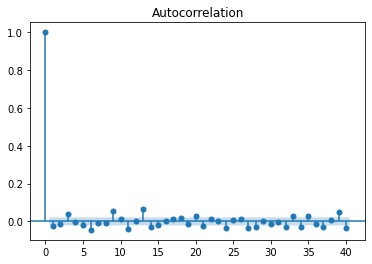

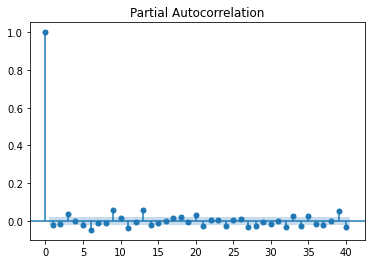

In [45]:
plot_acf(Train_s1[1:]); #for MA q=0
plot_pacf(Train_s1[1:]); #for MA p=0

In [46]:
model_arima =ARIMA(Train,order=(3,1,3))
model_arima_fit= model_arima.fit()
print(model_arima_fit.aic)

59941.41134677979


In [47]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                 8629
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -29962.706
Method:                       css-mle   S.D. of innovations              7.794
Date:                Sun, 13 Jun 2021   AIC                          59941.411
Time:                        19:53:21   BIC                          59997.914
Sample:                             1   HQIC                         59960.678
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1970      0.083      2.360      0.018       0.033       0.361
ar.L1.D.Value    -0.3715      0.029    -12.654      0.000      -0.429      -0.314
ar.L2.D.Value    -0.3219      0.031    -10.339      0.000      -0.383      -0.261
ar.L3.D.Value    -0.8491      0.036    -23.458      0.000      -0.920      -0.778
ma.L1.D.Value     0.3470      0.025     13.703      0.000       0.297       0.397
ma.L2.D.Value     0.3017      0.030     10.225      0.000       0.244       0.359
ma.L3.D.Value     0.8815      0.033     26.801      0.000       0.817       0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0427           -0.0000j            1.0427           -0.5000
AR.2            0.3318           -1.0096j            1.0628           -0.1995
AR.3            0.3318           +1.0096j            1.0628            0.1995
MA.1           -1.0298           -0.0000j            1.0298           -0.5000
MA.2            0.3438           -0.9917j            1.0496           -0.1969
MA.3            0.3438           +0.9917j            1.0496            0.1969
-----------------------------------------------------------------------------
"""

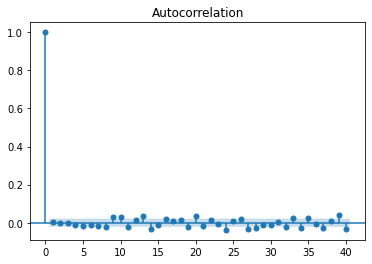

In [49]:
plot_acf(model_arima_fit.resid);

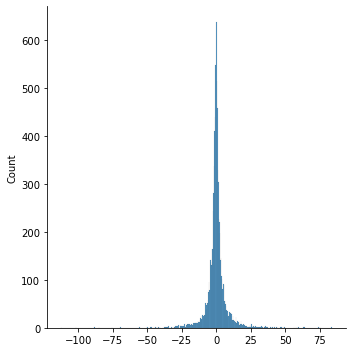

In [109]:
sb.displot(model_arima_fit.resid)

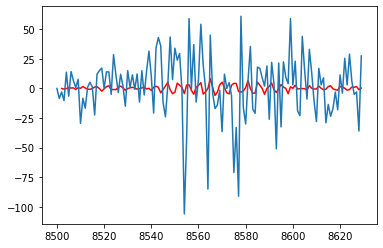

In [64]:
plt.plot(model_arima_fit.predict()[8500:],color='red')
plt.plot(Train_s1[8500:])

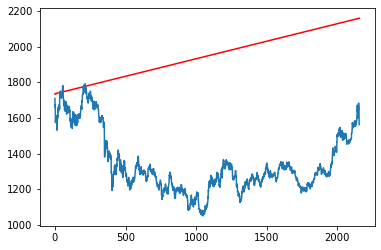

In [82]:
plt.plot(model_arima_fit.forecast(steps=2156)[0],color='red')
plt.plot(np.array(Test))

In [83]:
import sklearn

In [86]:
from sklearn.metrics import mean_squared_error as mse

In [87]:
import math

In [88]:
math.sqrt(mse(np.array(Test),model_arima_fit.forecast(steps=2156)[0]))

652.5002863938882

<AxesSubplot:>

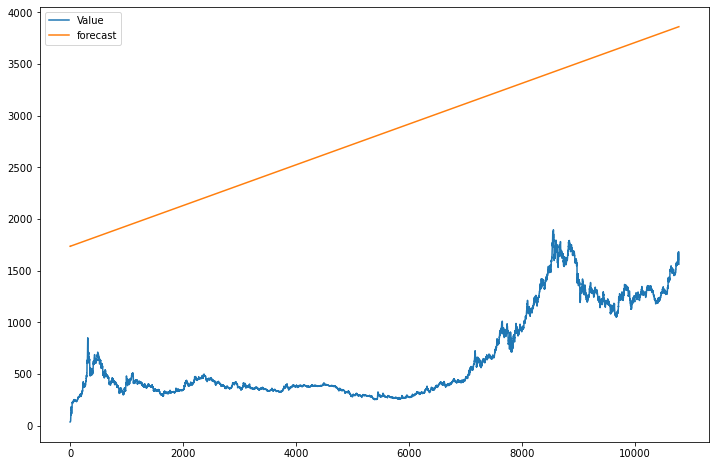

In [90]:
## data['forecast']=model_arima_fit.forecast(steps=10787)[0]
## data[['Value','forecast']].plot(figsize=(12,8))

In [32]:
# data['forecast']=model_arima_fit.predict(start=90,end=10000,dynamic=True)
# data[['Value','forecast']].plot(figsize=(12,8)) 

In [39]:
perdictions= model_arima_fit.forecast(steps=15)[0]
perdictions

array([1564.77513112, 1565.06192133, 1565.16374689, 1565.30304736,
       1565.44573998, 1565.58760961, 1565.72941871, 1565.87124571,
       1566.01307376, 1566.15490141, 1566.29672905, 1566.4385567 ,
       1566.58038434, 1566.72221199, 1566.86403964])

---

-----

In [34]:
from pmdarima.arima import auto_arima

In [38]:
model =auto_arima(data.Value, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=78083.955, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=78084.379, Time=0.90 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=78084.314, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=78084.607, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=78082.041, Time=6.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78074.887, Time=9.69 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=78081.730, Time=1.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78076.537, Time=10.33 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=78042.113, Time=16.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=78074.952, Time=7.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=78043.625, Time=25.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=78077.407, Time=21.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=78076.465, Time=10.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=78081.542, Time=14.03 sec
 ARIMA(2,1,2)

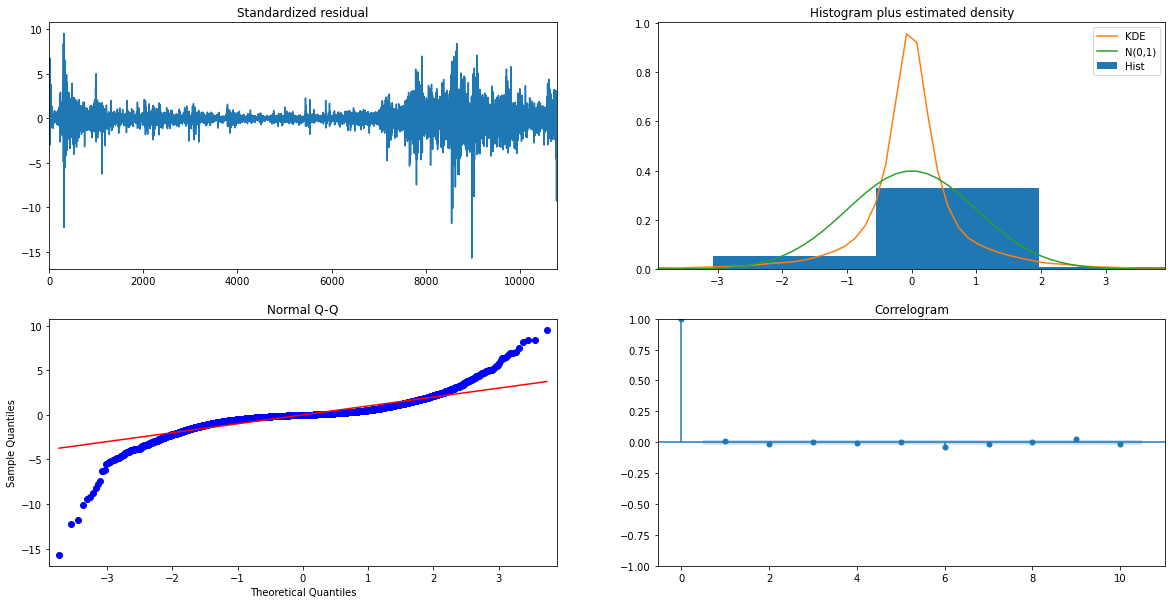

In [36]:
model.plot_diagnostics(figsize=(20,10))
plt.show()